# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project: Credit Card Fraud Detection



## Getting Started
In this project, we will employ several supervised algorithms to accurately model fraudulent and normal credit card transactions. We will then choose the best candidate algorithm from preliminary results and further optimize this algorithm to best model the data. Our goal with this implementation is to construct a model that accurately predicts whether a transactions is normal or fraudulent. This sort of task can arise in almost every transaction that takes place everyday using credit cards. Understanding the patterns of a fraudulent transaction can help a bank or organization better differentiate between a legit and an illegal activity. 

The dataset that is being used in this project is the Credit Card Fraud Detection dataset uploaded by Andrea Dal Pozzolo in Kaggle. The dataset has been collected and analyzed during a research collaboration of Worldline and the Machine Learning Group (http://mlg.ulb.ac.be) of ULB (Université Libre de Bruxelles) on big data mining and fraud detection. More details on current and past projects on related topics are available on http://mlg.ulb.ac.be/BruFence and http://mlg.ulb.ac.be/ARTML [Citation: Andrea Dal Pozzolo, Olivier Caelen, Reid A. Johnson and Gianluca Bontempi. Calibrating Probability with Undersampling for Unbalanced Classification. In Symposium on Computational Intelligence and Data Mining (CIDM), IEEE, 2015].

In [16]:
# Import the libraries necessary for this project
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Pretty display for notebooks
%matplotlib inline

# Load the dataset
try:
    data = pd.read_csv("C:\Users\Vimugdh\Downloads\Datasets\creditcardfraud\creditcard.csv")
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 284807 samples with 31 features each.


## Data Exploration


In [86]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


We can clearly see there are 31 columns with features `Time` shows the seconds elapsed between each transaction and the first transaction in the dataset, `V1` to `V28` are features that have been obtained through PCA and are anonimized due to confidentiality issues, `Amount` containing the transaction amount and `Class` which has has `0` for normal transactions or `1` for fraudulent ones.

Total number of records: 284807
Number of records where transaction is normal: 284315
Number of records where transaction is fraud: 492
Percentage of fraudulent transactions: 0.17%


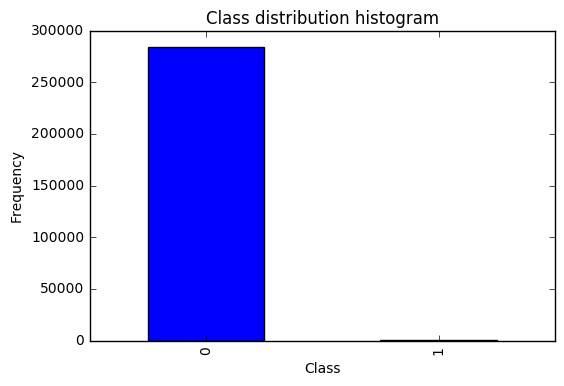

In [17]:
# Total number of records
n_records = len(data)

# Number of records where transaction is normal
n_normal = len(data[data.Class == 0])

# Number of records where transaction is fraud
n_fraud = len(data[data.Class == 1])

# Percentage of fraudulent transactions
fraud_percent = (n_fraud / float(n_records))* 100

# Print the results
print "Total number of records: {}".format(n_records)
print "Number of records where transaction is normal: {}".format(n_normal)
print "Number of records where transaction is fraud: {}".format(n_fraud)
print "Percentage of fraudulent transactions: {:.2f}%".format(fraud_percent)

#Obtaining visual representation of the Classes
n_classes = pd.value_counts(data['Class'], sort = True).sort_index()
n_classes.plot(kind = 'bar')
plt.title("Class distribution histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")

As we can see from the results the fraudulent transactions form **only 0.17% of the entire dataset** and thus, the dataset is **HIGHLY UNBALANCED!!** 
*This is a clear case where we **cannot** use Accuracy as the evaluation metric because even if we wrongly predict a Fraud transaction to be Normal, we shall still have an accuracy of more than 99%!!* We can adopt several ways of dealing with this:
- *Collect more data!* Collecting more data for the fraudulent transactions will lessen the imbalance but unfortunately, this isn't possible in this case as more of this data isn't available.
- *Changing the Evaluation Metric.* Using some other metric such as Precision, Recall or F-score. 
- *Resampling*: It is a technique that essentially will process the data to have an approximate 50-50 ratio. In this case, we shall use Undersampling, which deletes instances from the over-represented class.

Let's see how `Time` compares across fraudulent and normal transactions.

Fraud
count       492.000000
mean      80746.806911
std       47835.365138
min         406.000000
25%       41241.500000
50%       75568.500000
75%      128483.000000
max      170348.000000
Name: Time, dtype: float64
()
Normal
count    284315.000000
mean      94838.202258
std       47484.015786
min           0.000000
25%       54230.000000
50%       84711.000000
75%      139333.000000
max      172792.000000
Name: Time, dtype: float64


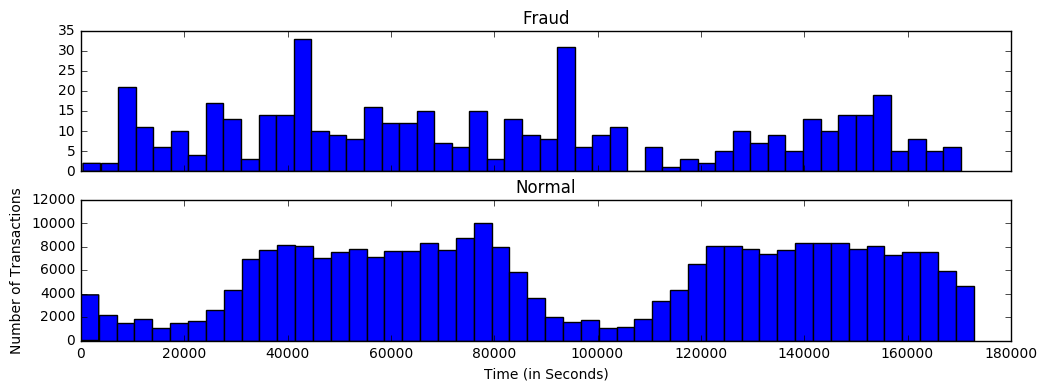

In [18]:
# Compare Time between Fraud and Normal transactions
print ("Fraud")
print (data.Time[data.Class == 1].describe())
print ()
print ("Normal")
print (data.Time[data.Class == 0].describe())

# Print visualization
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 50

ax1.hist(data.Time[data.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(data.Time[data.Class == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Number of Transactions')
plt.show()

Here, we can see that the Fraud transactions are more uniformly distributed than Normal transactions which have a more cyclic distribution. 

Now lets compare the transaction amount between the two Classes.

Fraud
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64
()
Normal
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


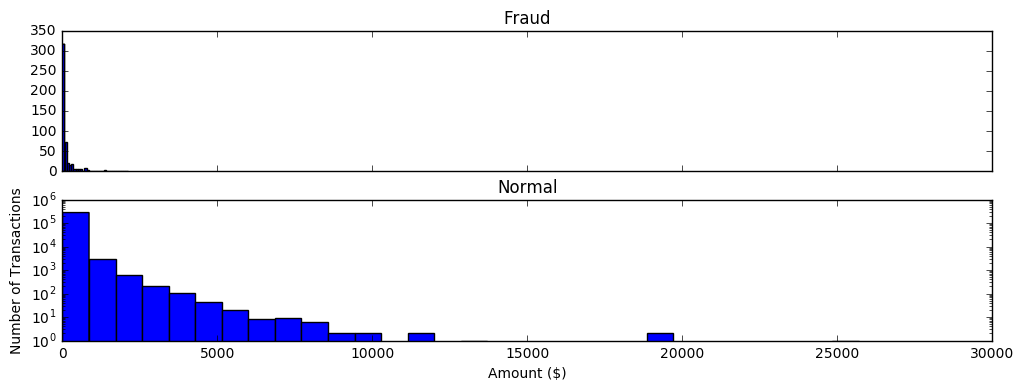

In [19]:
# Compare Time between Fraud and Normal transactions
print ("Fraud")
print (data.Amount[data.Class == 1].describe())
print ()
print ("Normal")
print (data.Amount[data.Class == 0].describe())

# Print visualization
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 30

ax1.hist(data.Amount[data.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(data.Amount[data.Class == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()

As we can clearly see, the Fraud transactions are of very small quantities compared to Normal transactions. The maximum Fraud transaction is just `$`2125.87 when compared to the maximum Normal transaction of `$`25691.16. Also, as visible from the histogram, less than a 100 fraud transactions have maximum values as compared to the far greater number of normal transactions (>10^3) which have large transaction values.

## Data Preprocessing

**Normalizing `Amount` feature to get it in line with the anonimized features.** 

In [20]:
from sklearn.preprocessing import StandardScaler

data['Normalized_Amount'] = StandardScaler().fit_transform(data['Amount'].reshape(-1, 1))
data = data.drop(['Time','Amount'],axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Normalized_Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


**Assigning X and Y without Undersampling.**

In [21]:
X = data.ix[:, data.columns != 'Class']
y = data.ix[:, data.columns == 'Class']

**Random Undersampling**

Here we shall randomly choose samples from the over-represented (Normal) class and remove them until the number of samples in it becomes equal to the number of samples in the previously under-represented (Fraud) class.

In [82]:
# Picking the indices of the fraud class
fraud_indices = np.array(data[data.Class == 1].index)

# Picking the indices of the normal class
normal_indices = data[data.Class == 0].index

# Out of the indices we picked, randomly select "x" number (n_fraud)
random_normal_indices = np.random.choice(normal_indices, n_fraud, replace = False)
random_normal_indices = np.array(random_normal_indices)

# Appending the 2 indices
undersample_indices = np.concatenate([fraud_indices, random_normal_indices])

# Under sample dataset
undersample_data = data.iloc[undersample_indices,:]

X_undersample = undersample_data.ix[:, undersample_data.columns != 'Class']
y_undersample = undersample_data.ix[:, undersample_data.columns == 'Class']

# Number of records where transaction is normal
n_normal = len(undersample_data[undersample_data.Class == 0])

# Number of records where transaction is fraud
n_fraud = len(undersample_data[undersample_data.Class == 1])

# Percentage of fraudelent transactions
fraud_percent = (n_fraud / float(len(undersample_data)))* 100

# Percentage of normal transactions
normal_percent = (n_normal / float(len(undersample_data)))* 100

# Showing ratio
print "Percentage of normal transactions: {:.2f}%".format(normal_percent)
print "Percentage of fraudulent transactions: {:.2f}%".format(fraud_percent)
print "Total number of transactions in resampled data: {:.2f}".format(len(undersample_data))

Percentage of normal transactions: 50.00%
Percentage of fraudulent transactions: 50.00%
Total number of transactions in resampled data: 984.00


** Exploring the Undersampled dataset. ** 

Total number of records: 984
Number of records where transaction is normal: 492
Number of records where transaction is fraud: 492
Percentage of fraudulent transactions: 50.00%


C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


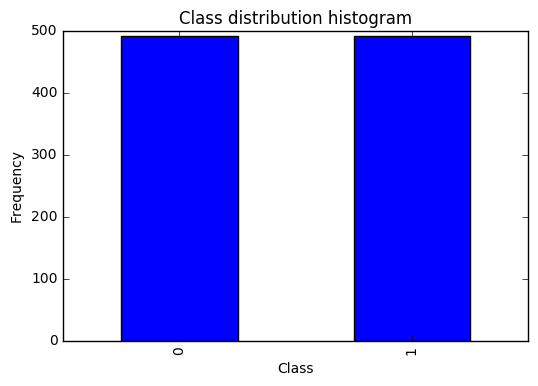

In [88]:
# Total number of records
n_undersample_records = len(undersample_data)

# Number of records where transaction is normal
n_undersample_normal = len(undersample_data[data.Class == 0])

# Number of records where transaction is fraud
n_undersample_fraud = len(undersample_data[data.Class == 1])

# Percentage of fraudulent transactions
undersample_fraud_percent = (n_undersample_fraud / float(n_undersample_records))* 100

# Print the results
print "Total number of records: {}".format(n_undersample_records)
print "Number of records where transaction is normal: {}".format(n_undersample_normal)
print "Number of records where transaction is fraud: {}".format(n_undersample_fraud)
print "Percentage of fraudulent transactions: {:.2f}%".format(undersample_fraud_percent)

#Obtaining visual representation of the Classes
n_classes = pd.value_counts(undersample_data['Class'], sort = True).sort_index()
n_classes.plot(kind = 'bar')
plt.title("Class distribution histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")

In [83]:
undersample_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Normalized_Amount
541,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,1,-0.353229
623,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,1,1.761758
4920,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,1,0.606031
6108,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,1,-0.117342
6329,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1,-0.349231


**Splitting into Test-Train splits for Cross-Validation.**

In [46]:
from sklearn.cross_validation import train_test_split

# Whole dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)

print "Number transactions train dataset: ", len(X_train)
print "Number transactions test dataset: ", len(X_test)
print "Total number of transactions: ", len(X_train)+len(X_test)

# Undersampled dataset
X_train_undersample, X_test_undersample, y_train_undersample, y_test_undersample = train_test_split(X_undersample
                                                                                                   ,y_undersample
                                                                                                   ,test_size = 0.3
                                                                                                   ,random_state = 43)
print "" 
print "Number transactions train dataset: ", len(X_train_undersample)
print "Number transactions test dataset: ", len(X_test_undersample)
print "Total number of transactions: ", len(X_train_undersample)+len(X_test_undersample)

Number transactions train dataset:  199364
Number transactions test dataset:  85443
Total number of transactions:  284807

Number transactions train dataset:  688
Number transactions test dataset:  296
Total number of transactions:  984


**Now we shall implement two classifier algorithms LinearSVC(), which specializes in < 100K data and hence should perform better on the undersampled set and SGDClassifier(), which is better for > 100K data and hence should perform better on the raw dataset.**

 ## Implementation (LinearSVC) - Training and Testing models on Undersampled data

In [25]:
from sklearn.svm import LinearSVC
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.metrics import confusion_matrix, auc, roc_auc_score, roc_curve, recall_score, classification_report 

**Writing a function to print K-fold scores to get the best C parameter to implement the LinearSVC model.**

In [68]:
def printing_Kfold_scores(x_train_data, y_train_data):
    fold = KFold(len(y_train_data), 5, shuffle = False) 

    # Different C parameters
    c_param_range = [0.01, 0.1, 1, 10, 100]

    results_table = pd.DataFrame(index = range(len(c_param_range),3), columns = ['C_parameter', 'Mean recall score'])
    results_table['C_parameter'] = c_param_range

    # the k-fold will give 2 lists: train_indices = indices[0], test_indices = indices[1]
    j = 0
    for c_param in c_param_range:
        print '-------------------------------------------'
        print 'C parameter: ', c_param
        print '-------------------------------------------'
        print ''

        recall_accs = []
        for iteration, indices in enumerate(fold,start=1):

            # Call the linear SVC model with a certain C parameter
            svc = LinearSVC(C = c_param, penalty = 'l2', dual = False, random_state = 43)

            # Use the training data to fit the model. In this case, we use the portion of the fold to train the model
            # with indices[0]. We then predict on the portion assigned as the 'test cross validation' with indices[1]
            svc.fit(x_train_data.iloc[indices[0],:],y_train_data.iloc[indices[0],:].values.ravel())

            # Predict values using the test indices in the training data
            y_pred_undersample = svc.predict(x_train_data.iloc[indices[1],:].values)

            # Calculate the recall score and append it to a list for recall scores representing the current c_parameter
            recall_acc = recall_score(y_train_data.iloc[indices[1],:].values,y_pred_undersample)
            recall_accs.append(recall_acc)
            print('Iteration ', iteration,': recall score = ', recall_acc)

        # The mean value of those recall and auc scores is the metric we want to save and get hold of.
        results_table.ix[j,'Mean recall score'] = np.mean(recall_accs)
        j += 1
        print ''
        print 'Mean recall score ', np.mean(recall_accs)
        print ''
        
    best_c = results_table.loc[results_table['Mean recall score'].idxmax()]['C_parameter']
    
    # Finally, we can check which C parameter is the best amongst the chosen.
    print '*********************************************************************************'
    print 'Best model to choose from cross validation is with C parameter = ', best_c
    print '*********************************************************************************'
    
    return best_c

In [48]:
best_c = printing_Kfold_scores(X_train_undersample,y_train_undersample)

-------------------------------------------
C parameter:  0.01
-------------------------------------------

('Iteration ', 1, ': recall score = ', 0.90000000000000002)
('Iteration ', 2, ': recall score = ', 0.93506493506493504)
('Iteration ', 3, ': recall score = ', 0.91891891891891897)
('Iteration ', 4, ': recall score = ', 0.92307692307692313)
('Iteration ', 5, ': recall score = ', 0.83333333333333337)

Mean recall score  0.902078822079

-------------------------------------------
C parameter:  0.1
-------------------------------------------

('Iteration ', 1, ': recall score = ', 0.88571428571428568)
('Iteration ', 2, ': recall score = ', 0.93506493506493504)
('Iteration ', 3, ': recall score = ', 0.91891891891891897)
('Iteration ', 4, ': recall score = ', 0.93846153846153846)
('Iteration ', 5, ': recall score = ', 0.84848484848484851)

Mean recall score  0.905328905329

-------------------------------------------
C parameter:  1
-------------------------------------------

('Iterat

**Here we see that the Mean recall score for the default C parameter (1.0) is 90.52% whereas for the best C parameter (100.0) is 90.85%. Hence we shall optimize our model and instead of using the default C parameter, we shall use the best C parameter.**

In [49]:
# Use this C_parameter to build the final model with the whole training dataset and predict the classes in the test
# dataset
svc = LinearSVC(C = best_c, penalty = 'l1', dual = False, random_state = 43)
svc.fit(X_train_undersample, y_train_undersample.values.ravel())
y_pred_undersample = svc.predict(X_test_undersample.values)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test_undersample, y_pred_undersample)
np.set_printoptions(precision = 2)

print "Recall metric in the testing dataset: ", cnf_matrix[1,1] / float ((cnf_matrix[1,0]+cnf_matrix[1,1]))

Recall metric in the testing dataset:  0.942857142857


**Thus we see the model offers a Recall score of 94.28% on the Undersampled test set! Now lets try this on the total test set.**

In [50]:
# Use this C_parameter to build the final model with the whole training dataset and predict the classes in the test
# dataset
svc = LinearSVC(C = best_c, penalty = 'l1', dual = False, random_state = 43)
svc.fit(X_train_undersample, y_train_undersample.values.ravel())
y_pred = svc.predict(X_test.values)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision = 2)

print "Recall metric in the testing dataset: ", cnf_matrix[1,1] / float ((cnf_matrix[1,0]+cnf_matrix[1,1]))

Recall metric in the testing dataset:  0.925170068027


### We can see that the Recall score of 92.51% is really good for a test set of the skewed data! Now in order to compare our results to the benchmark model, we also need to compute the AUC scores.

** Calculating the AUC scores. **

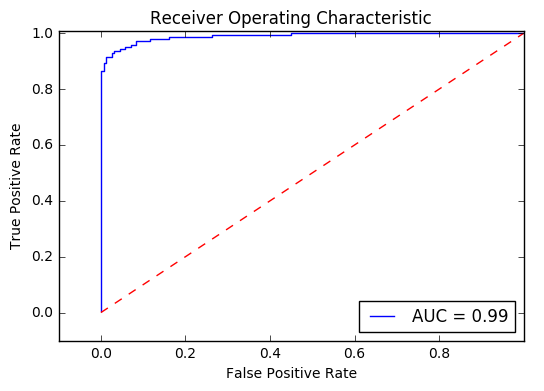

In [51]:
# ROC CURVE
svc = LinearSVC(C = best_c, penalty = 'l1', dual = False, random_state = 43)
y_pred_undersample_score = svc.fit(X_train_undersample,y_train_undersample.values.ravel()).decision_function(X_test_undersample.values)

fpr, tpr, thresholds = roc_curve(y_test_undersample.values.ravel(),y_pred_undersample_score)
roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**Thus, we get AUC scores of 99% when training as well as testing is done on the undersampled data test set. Now lets try testing this on the testing set of the skewed data.**

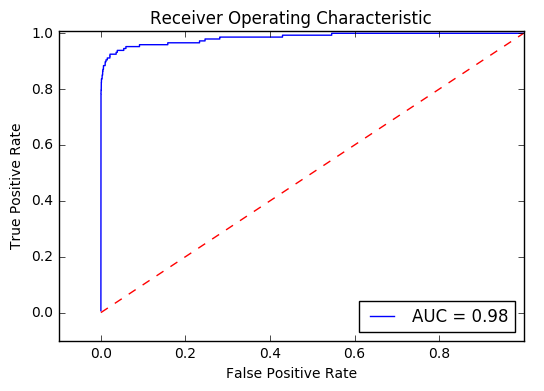

In [52]:
# ROC CURVE
svc = LinearSVC(C = best_c, penalty = 'l1', dual = False, random_state = 43)
y_pred_undersample_score = svc.fit(X_train_undersample,y_train_undersample.values.ravel()).decision_function(X_test.values)

fpr, tpr, thresholds = roc_curve(y_test.values.ravel(),y_pred_undersample_score)
roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

** Here, we get AUC scores of 98% when testing is done on the skewed data test set! This is more than the 85% of our benchmark model although, the training here is done on the undersampled dataset and cannot be considered a true result for comparison.**

## Implementation (LinearSVC) - Training and Testing models on Skewed data

**Now that we know that our approach works, let us try the same approach on the skewed data.** We know that the skewed data shall introduce two new complexities:
- **Space**: The original skewed dataset is huge when compared to the undersampled dataset and hence, in sheer size, it is more complex.
- **Skewedness**: This is the primary problem that we are aware of. The data imbalance shall affect the performance of the model too.

Lets see how things work out.

In [53]:
best_c = printing_Kfold_scores(X_train,y_train)

-------------------------------------------
C parameter:  0.01
-------------------------------------------

('Iteration ', 1, ': recall score = ', 0.58208955223880599)
('Iteration ', 2, ': recall score = ', 0.58904109589041098)
('Iteration ', 3, ': recall score = ', 0.6333333333333333)
('Iteration ', 4, ': recall score = ', 0.63076923076923075)
('Iteration ', 5, ': recall score = ', 0.47499999999999998)

Mean recall score  0.582046642446

-------------------------------------------
C parameter:  0.1
-------------------------------------------

('Iteration ', 1, ': recall score = ', 0.58208955223880599)
('Iteration ', 2, ': recall score = ', 0.60273972602739723)
('Iteration ', 3, ': recall score = ', 0.65000000000000002)
('Iteration ', 4, ': recall score = ', 0.63076923076923075)
('Iteration ', 5, ': recall score = ', 0.48749999999999999)

Mean recall score  0.590619701807

-------------------------------------------
C parameter:  1
-------------------------------------------

('Iterati

In [54]:
# Use this C_parameter to build the final model with the whole training dataset and predict the classes in the test
# dataset
svc = LinearSVC(C = best_c, penalty = 'l1', dual = False, random_state = 43)
svc.fit(X_train,y_train.values.ravel())
y_pred_undersample = svc.predict(X_test.values)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test,y_pred_undersample)
np.set_printoptions(precision=2)

print "Recall metric in the testing dataset: ", cnf_matrix[1,1] / float ((cnf_matrix[1,0]+cnf_matrix[1,1]))

Recall metric in the testing dataset:  0.591836734694


**We see how training on the raw skewed data severely reduces our Recall metric from 92.51% to a mere 59.18%. **

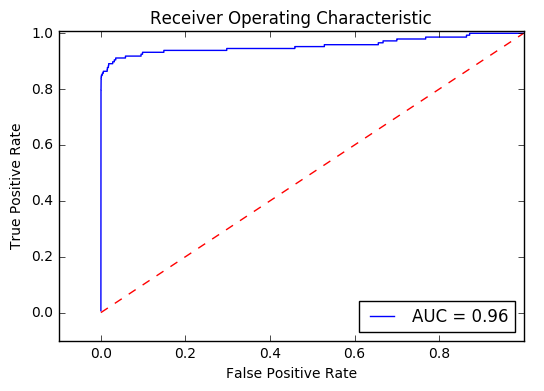

In [67]:
# ROC CURVE
svc = LinearSVC(C = best_c, penalty = 'l1', dual = False, random_state = 43)
y_pred_score = svc.fit(X_train,y_train.values.ravel()).decision_function(X_test.values)

fpr, tpr, thresholds = roc_curve(y_test.values.ravel(),y_pred_score)
roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

** This is the AUC score of 96% that we shall compare against the Benchmark's AUC score of 85% as here both the training and the testing has been done on the raw data's train and test set. Let us now try this entire implementation procedure with the SGDClassifier() to see it performs any better.**

## Implementation (SGDClassifier) - Training and Testing models on Undersampled data

In [55]:
from sklearn.linear_model import SGDClassifier

**Writing a function to print K-fold scores to get the best loss parameter to implement the SGDClassifier model.**

In [71]:
def printing_Kfold_scores_SGD(x_train_data, y_train_data):
    fold = KFold(len(y_train_data), 5, shuffle = False) 

    # Different Loss
    loss_range = ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron', 'squared_loss', 'huber', 'epsilon_insensitive','squared_epsilon_insensitive']

    results_table = pd.DataFrame(index = range(len(loss_range),2), columns = ['Loss', 'Mean recall score'])
    results_table['Loss'] = loss_range

    # the k-fold will give 2 lists: train_indices = indices[0], test_indices = indices[1]
    j = 0
    for loss_rate in loss_range:
        print '-------------------------------------------'
        print 'Loss: ', loss_rate
        print '-------------------------------------------'
        print ''

        recall_accs = []
        for iteration, indices in enumerate(fold,start=1):

            # Call the SGDClassifier with a certain learning_rate
            sgd = SGDClassifier(loss = loss_rate, penalty = 'l1', eta0 = 0.1, random_state = 43)
            # Use the training data to fit the model. In this case, we use the portion of the fold to train the model
            # with indices[0]. We then predict on the portion assigned as the 'test cross validation' with indices[1]
            sgd.fit(x_train_data.iloc[indices[0],:],y_train_data.iloc[indices[0],:].values.ravel())

            # Predict values using the test indices in the training data
            y_pred_undersample = sgd.predict(x_train_data.iloc[indices[1],:].values)

            # Calculate the recall score and append it to a list for recall scores representing the current c_parameter
            recall_acc = recall_score(y_train_data.iloc[indices[1],:].values,y_pred_undersample)
            recall_accs.append(recall_acc)
            print('Iteration ', iteration,': recall score = ', recall_acc)

        # The mean value of those recall and auc scores is the metric we want to save and get hold of.
        results_table.ix[j,'Mean recall score'] = np.mean(recall_accs)
        j += 1
        print ''
        print 'Mean recall score ', np.mean(recall_accs)
        print ''
        
    best_loss = results_table.loc[results_table['Mean recall score'].idxmax()]['Loss']
    
    # Finally, we can check which Learning rate is the best amongst the chosen.
    print '*********************************************************************************'
    print 'Best model to choose from cross validation is with Loss = ', best_loss
    print '*********************************************************************************'
    
    return best_loss

In [72]:
best_loss = printing_Kfold_scores_SGD(X_train_undersample,y_train_undersample)

-------------------------------------------
Loss:  hinge
-------------------------------------------

('Iteration ', 1, ': recall score = ', 0.88571428571428568)
('Iteration ', 2, ': recall score = ', 0.94805194805194803)
('Iteration ', 3, ': recall score = ', 0.91891891891891897)
('Iteration ', 4, ': recall score = ', 0.9538461538461539)
('Iteration ', 5, ': recall score = ', 0.89393939393939392)

Mean recall score  0.920094140094

-------------------------------------------
Loss:  log
-------------------------------------------

('Iteration ', 1, ': recall score = ', 0.88571428571428568)
('Iteration ', 2, ': recall score = ', 0.93506493506493504)
('Iteration ', 3, ': recall score = ', 0.91891891891891897)
('Iteration ', 4, ': recall score = ', 0.93846153846153846)
('Iteration ', 5, ': recall score = ', 0.89393939393939392)

Mean recall score  0.91441981442

-------------------------------------------
Loss:  modified_huber
-------------------------------------------

('Iteration ', 1,

**Here we see that the Mean recall score for the default loss function (`'hinge'`) is 90.85% whereas for the best loss (`'perceptron'`) is 92.30%. We have also analyzed all the other loss functions to compare them and have finally settled with `log` loss function. Hence we shall optimize our model and instead of using the default loss function, we shall use the best loss function.**

In [58]:
# Use this loss function to build the final model with the whole training dataset and predict the classes in the test
# dataset
sgd = SGDClassifier(loss = best_loss, penalty = 'l1', eta0 = 0.1, random_state = 43)
sgd.fit(X_train_undersample, y_train_undersample.values.ravel())
y_pred_undersample = sgd.predict(X_test_undersample.values)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test_undersample, y_pred_undersample)
np.set_printoptions(precision = 2)

print "Recall metric in the testing dataset: ", cnf_matrix[1,1] / float ((cnf_matrix[1,0]+cnf_matrix[1,1]))

Recall metric in the testing dataset:  0.907142857143


**Thus we see the model offers a Recall score of 90.71% on the Undersampled test set! This is lower than the Recall score of 94.28% that our LinearSVC model was providing. Now lets try this on the total test set.**

In [59]:
# Use this loss function to build the final model with the whole training dataset and predict the classes in the test
# dataset
sgd = SGDClassifier(loss = best_loss, penalty = 'l1', eta0 = 0.1, random_state = 43)
sgd.fit(X_train_undersample, y_train_undersample.values.ravel())
y_pred = sgd.predict(X_test.values)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision = 2)

print "Recall metric in the testing dataset: ", cnf_matrix[1,1] / float ((cnf_matrix[1,0]+cnf_matrix[1,1]))

Recall metric in the testing dataset:  0.884353741497


### We can see that the Recall score of 88.43% is really good for a test set of the skewed data although this is lesser than the Recall score of 92.51% that the LinearSVC model was providing! Now in order to compare our results to the benchmark model, we also need to compute the AUC scores.

**Calculating AUC scores.**

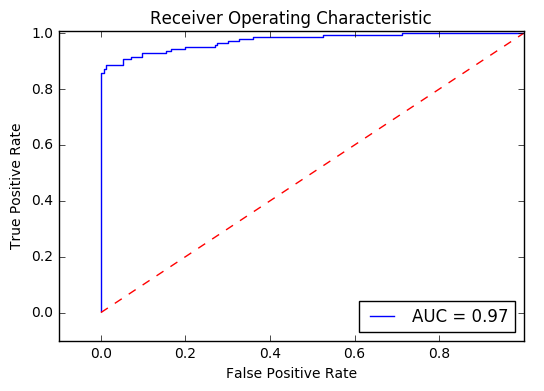

In [60]:
# ROC CURVE
sgd = SGDClassifier(loss = best_loss, penalty = 'l1', eta0 = 0.1, random_state = 43)
y_pred_undersample_score = sgd.fit(X_train_undersample,y_train_undersample.values.ravel()).decision_function(X_test_undersample.values)

fpr, tpr, thresholds = roc_curve(y_test_undersample.values.ravel(),y_pred_undersample_score)
roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**Thus, we get AUC scores of 97% when training as well as testing is done on the undersampled data test set! These scores are _slightly_ less then the LinearSVC scores of 99% on the undersampled data test set although they're still good scores. Now lets try testing this on the testing set of the skewed data.**

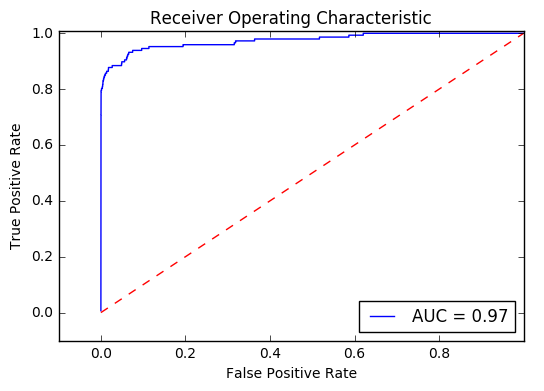

In [62]:
# ROC CURVE
sgd = SGDClassifier(loss = best_loss, penalty = 'l1', eta0 = 0.1, random_state = 43)
y_pred_undersample_score = sgd.fit(X_train_undersample,y_train_undersample.values.ravel()).decision_function(X_test.values)

fpr, tpr, thresholds = roc_curve(y_test.values.ravel(),y_pred_undersample_score)
roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**Although the AUC score for SGDClassifier of 97% fall just one percent below the LinearSVC classifier AUC score of 98%, our AUC scores for the skewed dataset can still be considered as good! **

## Implementation (SGDClassifier) - Training and Testing models on Skewed data

We implemented the LinearSVC model on the entire raw dataset and we sall how drastically the imbalance affected the recall scores as they fell from **92.51% to a mere 59.18%**. We should expect the same here. Let's see how much it affects our scores, though.

In [63]:
best_loss = printing_Kfold_scores_SGD(X_train,y_train)

-------------------------------------------
Loss:  hinge
-------------------------------------------

('Iteration ', 1, ': recall score = ', 0.74626865671641796, ': auc score = ', 0.87295847547170946)
('Iteration ', 2, ': recall score = ', 0.67123287671232879, ': auc score = ', 0.83546568458732018)
('Iteration ', 3, ': recall score = ', 0.69999999999999996, ': auc score = ', 0.84983673674427962)
('Iteration ', 4, ': recall score = ', 0.70769230769230773, ': auc score = ', 0.85368287008409605)
('Iteration ', 5, ': recall score = ', 0.6875, ': auc score = ', 0.84361178126256542)

Mean recall score  0.702538768224


Mean auc score  0.85111110963

-------------------------------------------
Loss:  log
-------------------------------------------

('Iteration ', 1, ': recall score = ', 0.76119402985074625, ': auc score = ', 0.88043372295933786)
('Iteration ', 2, ': recall score = ', 0.64383561643835618, ': auc score = ', 0.82177961726440429)
('Iteration ', 3, ': recall score = ', 0.699999999

In [64]:
# Use this loss function to build the final model with the whole training dataset and predict the classes in the test
# dataset
sgd = SGDClassifier(loss = best_loss, penalty = 'l1', eta0 = 0.1, random_state = 43)
sgd.fit(X_train,y_train.values.ravel())
y_pred_undersample = sgd.predict(X_test.values)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test,y_pred_undersample)
np.set_printoptions(precision=2)

print "Recall metric in the testing dataset: ", cnf_matrix[1,1] / float ((cnf_matrix[1,0]+cnf_matrix[1,1]))

Recall metric in the testing dataset:  0.700680272109


**Thus, we see the Recall score of 70.06% we get on the raw skewed dataset with SGDClassifier is way better than the Recall score of 59.18% that we get from the LinearSVC classifier.**

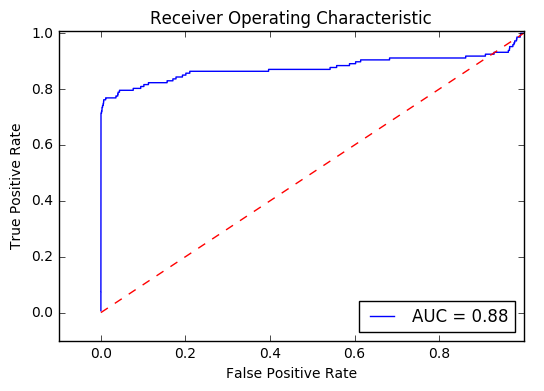

In [66]:
# ROC CURVE
sgd = SGDClassifier(loss = best_loss, penalty = 'l1', eta0 = 0.1, random_state = 43)
y_pred_score = sgd.fit(X_train,y_train.values.ravel()).decision_function(X_test.values)

fpr, tpr, thresholds = roc_curve(y_test.values.ravel(),y_pred_score)
roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**This shall be the final AUC score of 88% that we shall compare against our Benchmark model's AUC score of 85% as this is completely tested using the raw dataset's train and test sets. It is slightly better than the Benchmark model's score.** 